In [1]:
import numpy as np

In [6]:
A = np.zeros((3, 3))
A.shape

(3, 3)

In [10]:
# LU Decomposition
def lu_decomposition(A):
    number_of_rows = A.shape[0]

    U = A.copy()
    L = np.eye(number_of_rows, dtype=np.float32)

    for row_index in range(number_of_rows):
        factor = U[row_index+1:, row_index] / U[row_index, row_index]
        L[row_index+1:, row_index] = factor
        U[row_index+1:] = U[row_index+1:] - factor[:, np.newaxis] * U[row_index]

    return L, U

In [11]:
A = np.random.random((3, 3))
L, U = lu_decomposition(A)

In [12]:
A

array([[0.957836  , 0.76867585, 0.06333503],
       [0.59584717, 0.12088638, 0.57803128],
       [0.9895265 , 0.61331917, 0.53353728]])

In [13]:
L

array([[1.       , 0.       , 0.       ],
       [0.6220764, 1.       , 0.       ],
       [1.0330855, 0.5060018, 1.       ]], dtype=float32)

In [14]:
U

array([[ 9.57836004e-01,  7.68675854e-01,  6.33350335e-02],
       [ 0.00000000e+00, -3.57288722e-01,  5.38632050e-01],
       [-1.11022302e-16,  0.00000000e+00,  1.95558007e-01]])

In [19]:
A_reconstructed = np.matmul(L, U)

In [20]:
A == A_reconstructed

array([[ True,  True,  True],
       [False, False, False],
       [False, False, False]])

In [21]:
A[1, 0], A_reconstructed[1, 0]

(0.5958471705266557, 0.5958471655101318)

In [26]:
a = np.array((1,), dtype=np.double)
a[0] = 1.0
for i in range(1000000):
    a[0] = a[0] / 100.0
    if i % 10000 == 0:
        print(a)

[0.01]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


In [29]:
# Introduction to error analysis
def error(A, B):
    diff = A - B
    number_of_rows = diff.shape[0]
    number_of_columns = diff.shape[1]
    err = 0
    for row_index in range(number_of_rows):
        for column_index in range(number_of_columns):
            err_term = diff[row_index, column_index] ** 2
            err += err_term
    err = err ** 0.5 # np.sqrt(err)
    return err

error_threshold = 0.001
if error(A, A_reconstructed) > error_threshold:
    print("Bad reconstruction")
else:
    print("Good reconstruction")

Good reconstruction


In [30]:
def compute_something(A):
    A_computed = A_real.copy()
    A_computed[1, 1] = np.random.random()
    A_computed[1, 2] = np.random.random()
    return A_computed

steps = list(range(100))
A_real = np.random.random((3, 3))

errors = []
for step in steps:
    A_computed = compute_something(A)
    err = error(A_real, A_computed)
    errors.append(err)

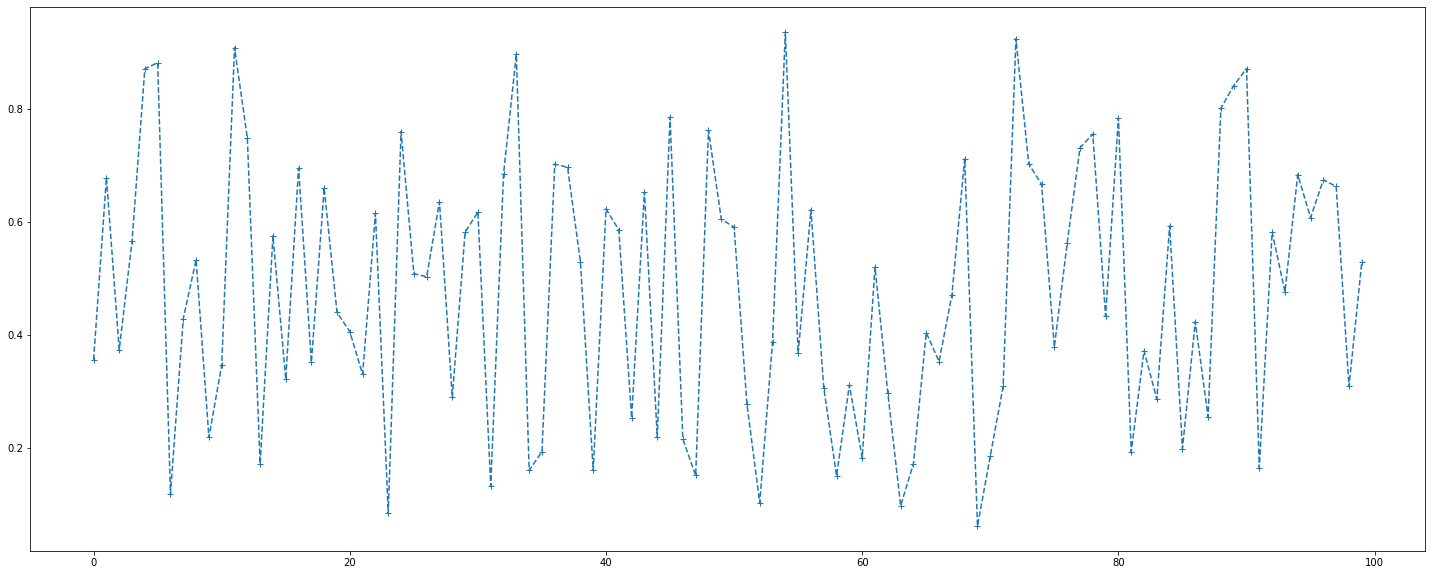

In [37]:
import matplotlib.pyplot as plt

_ = plt.figure(figsize=(25, 10))
plt.plot(steps, errors, "--", marker="+")
plt.show()

In [39]:
err_mean = np.mean(errors)
err_std = np.std(errors)
err_mean, err_std

(0.4792525536666854, 0.23506686349377215)

In [40]:
# example of exploding error
def compute_something_else(A, step):
    A_computed = A.copy()
    A_computed[1, 1] = A_computed[1, 1] * np.exp(step)
    A_computed[1, 2] = A_computed[1, 2] * np.exp(step)
    return A_computed

In [41]:
steps = list(range(100))
A_real = np.random.random((3, 3))

errors = []
for step in steps:
    A_computed = compute_something_else(A, step)
    err = error(A_real, A_computed)
    errors.append(err)

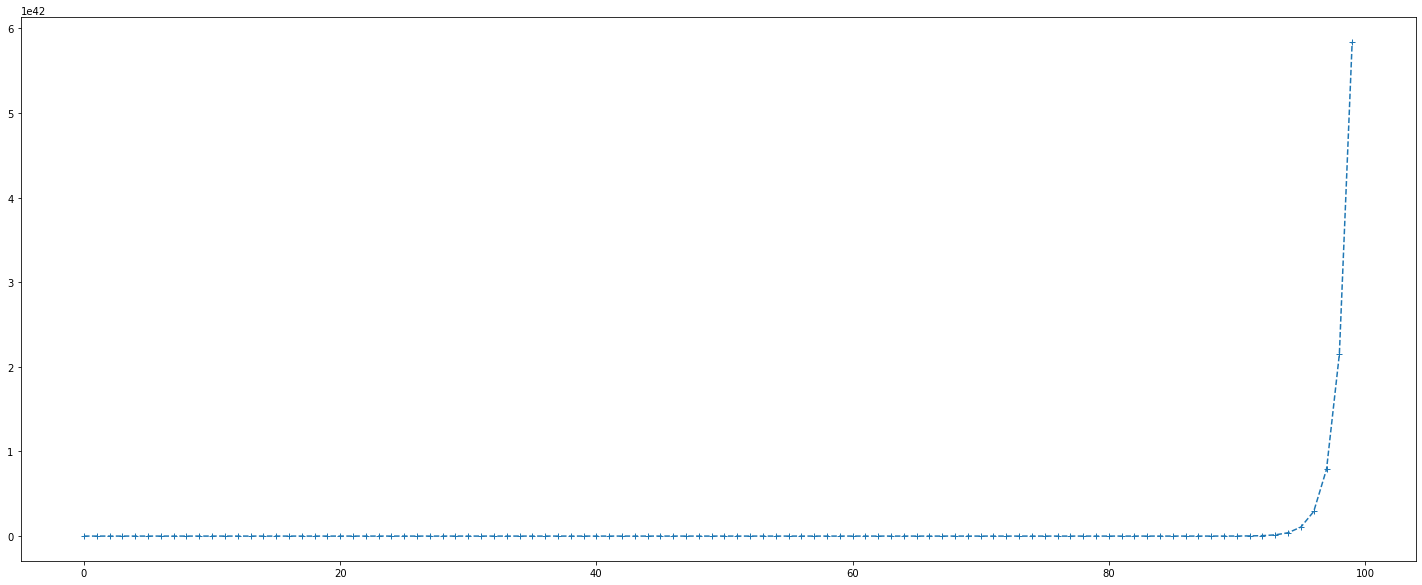

In [42]:
_ = plt.figure(figsize=(25, 10))
plt.plot(steps, errors, "--", marker="+")
plt.show()

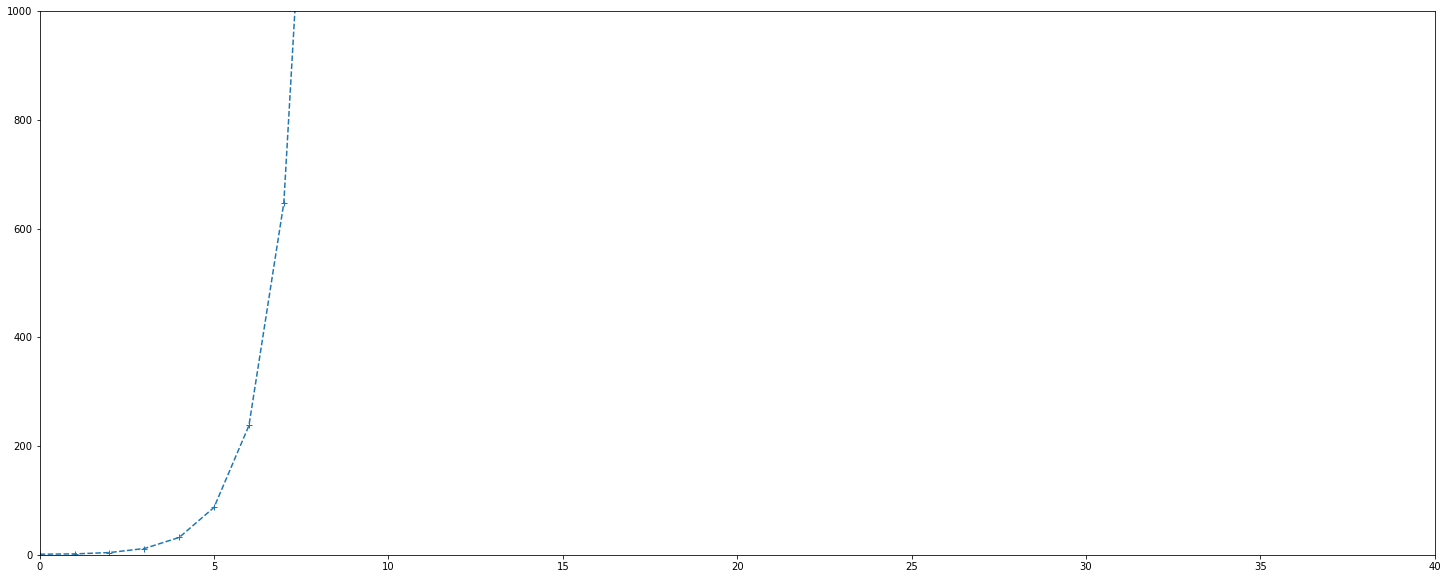

In [44]:
_ = plt.figure(figsize=(25, 10))
plt.plot(steps, errors, "--", marker="+")
plt.xlim(0, 40)
plt.ylim(0, 1000)
plt.show()

In [45]:
err_mean = np.mean(errors)
err_std = np.std(errors)
err_mean, err_std

(9.238484568208664e+40, 6.211925403756758e+41)